# Problem Statement
The problem revolves around understanding and predicting graduate admissions. Company aims to enhance its services by analyzing critical factors influencing admissions and leveraging these insights to build a predictive model. The dataset provided will be central to this task.

# Core Challenges
- **Factor Identification:** Determine which variables significantly influence graduate admissions.
- **Interrelationship Analysis:** Understand how these variables interact with each other.
- **Predictive Accuracy:** Construct a robust model to predict admission probabilities, especially tailored to Indian applicants.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [3]:
df.shape

(500, 9)

There are 500 rows and 9 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

It looks like there are no null values

# Dataset Exploration

In [6]:
df.keys()

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
for i in df.keys():
    print(f'Column name: {i} and it contains \n {df[i].value_counts()}\n\n')

Column name: Serial No. and it contains 
 Serial No.
500    1
1      1
2      1
3      1
484    1
      ..
9      1
8      1
7      1
6      1
5      1
Name: count, Length: 500, dtype: int64


Column name: GRE Score and it contains 
 GRE Score
312    24
324    23
316    18
322    17
327    17
321    17
311    16
320    16
314    16
325    15
317    15
308    13
323    13
315    13
300    12
319    12
313    12
326    12
304    12
318    12
305    11
310    11
301    11
307    10
329    10
299    10
298    10
331     9
328     9
309     9
340     9
330     8
334     8
332     8
302     7
306     7
297     6
296     5
303     5
336     5
295     5
333     4
338     4
335     4
339     3
337     2
294     2
290     2
293     1
Name: count, dtype: int64


Column name: TOEFL Score and it contains 
 TOEFL Score
110    44
105    37
104    29
106    28
107    28
112    28
103    25
100    24
102    24
99     23
111    20
101    20
108    19
109    19
113    19
114    18
116    16
115    11
118

#### Column details:
- **Serial No.:** This column represents the unique row identifier for each applicant in the
dataset.
- **GRE Scores:** This column contains the GRE (Graduate Record Examination) scores of the applicants, which are measured on a scale of 0 to 340.
- **TOEFL Scores:** This column includes the TOEFL (Test of English as a Foreign Language) scores of the applicants, which are measured on a scale of 0 to 120.
- **University Rating:** This column indicates the rating or reputation of the university that the applicants are associated with.
    - The rating is based on a scale of 0 to 5, with 5 representing the highest rating.
- **SOP:** This column represents the strength of the applicant's statement of purpose, rated on a scale of 0 to 5, with 5 indicating a strong and compelling SOP.
- **LOR:** This column represents the strength of the applicant's letter of recommendation, rated on a scale of 0 to 5, with 5 indicating a strong and compelling LOR.
- **CGPA:** This column contains the undergraduate Grade Point Average (GPA) of the applicants, which is measured on a scale of 0 to 10.
- **Research:** This column indicates whether the applicant has research experience (1) or not (0).
- **Chance of Admit:** This column represents the estimated probability or chance of admission for each applicant, ranging from 0 to 1.

In [8]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


#### Column-Wise Analysis
- GRE Score
    - Mean: 316.47, Std: 11.3
    - The majority of scores (middle 50%) fall between 308 (25th percentile) and 325 (75th percentile), showing a strong central tendency around competitive GRE scores.
    - The range (290 to 340) suggests no extreme outliers.
- TOEFL Score
    - Mean: 107.19, Std: 6.08
    - Scores are tightly clustered around the mean, with most falling between 103 and 112.
    - The minimum score of 92 indicates a few weaker applicants, while the maximum of 120 represents a perfect TOEFL score.
- University Rating
    - Mean: 3.11, Std: 1.14
    - Ratings are evenly distributed, with many universities rated between 2 and 4. Few universities have the highest rating of 5 or the lowest rating of 1.
- SOP (Statement of Purpose) and LOR (Letter of Recommendation Strength)
    - Means: 3.37 (SOP) and 3.48 (LOR), Std: ~1.0
    - Both have similar distributions, with the majority rated 3 or higher.
    - SOP and LOR ratings of 1 are rare, indicating most applicants have reasonably strong submissions.
- CGPA
    - Mean: 8.58, Std: 0.6
    - CGPA scores are tightly clustered, with most falling between 8.13 and 9.04. This high average reflects a competitive applicant pool.
    - The maximum value of 9.92 indicates exceptionally strong academic profiles.
- Research
    - Mean: 0.56, Std: 0.49
    - ~56% of applicants have research experience. This binary variable is well-balanced and likely impactful for predictive modeling.
- Chance of Admit
    - Mean: 0.72, Std: 0.14
    - The majority of applicants have an admission probability between 0.63 and 0.82 (middle 50%).
    - A minimum of 0.34 suggests the inclusion of lower-probability applicants, while a maximum of 0.97 indicates highly competitive profiles.

#### General Insights
- Highly Competitive Dataset:
    - The applicant pool is strong, with high GRE, TOEFL, CGPA, and SOP/LOR ratings.
- Importance of Research:
    - With 56% having research experience, this feature could act as a strong differentiator.
- Predictive Modeling Considerations:
    - GRE Score, TOEFL Score, CGPA, University Rating, and Research are likely to be strong predictors of Chance of Admit.
    - Normalizing or scaling features like GRE, TOEFL, and CGPA will help ensure that all variables contribute equally to model performance.
- Strategic Recommendations:
    - Company can emphasize the importance of strong SOPs and LORs, as the data shows high ratings in these areas.
    - Targeting research experience and improving TOEFL/GRE thresholds may be key for borderline applicants to improve their profiles.

#### Additional Insights
- **Test Scores Analysis:** Focus on GRE and TOEFL scores, as they are crucial for Ivy League admissions. Analyze thresholds and determine the minimum scores for higher admission probabilities.
- **Academic Background:** Rely on CGPA as a proxy for the applicant's academic strength. Examine its relationship with admission chances, particularly for competitive universities.
- **Qualitative Evaluation:** Utilize SOP and LOR ratings to assess their impact on admission likelihood, focusing on how these components can strengthen an application when combined with solid test scores.
- **Research Experience:** Investigate the influence of research experience (binary feature) on admissions. Highlight its importance in differentiating applicants with similar academic profiles.
- **Feature Engineering:** Create derived metrics such as a weighted score combining GRE, TOEFL, and CGPA, or interaction terms like GRE × Research to improve model interpretability and predictive accuracy.
- **Model Validation:** Employ cross-validation techniques to ensure that the predictive model performs consistently and generalizes well across various subsets of the dataset.

#### Strategic Impact
**For Company:** <br>
- **Data-Driven Services:** Use GRE, TOEFL, CGPA, SOP, and LOR insights to create a predictive admission tool for the website, enhancing its utility and user experience.
- **Student Preparation Strategy:** Tailor guidance programs to help students strengthen weaker areas, such as improving SOP quality or targeting specific GRE/TOEFL score ranges.<br><br>
**For Students:** <br>
- **Transparent Insights:** Provide clear predictions about admission chances based on the dataset's quantifiable factors, helping students set realistic expectations.
- **Focused Improvement Areas:** Offer practical recommendations to improve their profiles, such as emphasizing research experience or targeting GRE score improvements.

In [10]:
df.duplicated().sum()

np.int64(0)

There are no duplicated rows in the dataset

- there is a categorical columns: Research (but it is in boolean format)
- there are ordinal columns: University Rating, SOP, LOR
- there are numerical columns: GRE Score, TOEFL Score, Chance of Admit

We can drop the column: Serial No., as it is not adding any value to our business case study

In [11]:
df = df.drop(columns=['Serial No.'])

In [12]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# Univariate Analysis

In [13]:
df.Research.value_counts()

Research
1    280
0    220
Name: count, dtype: int64

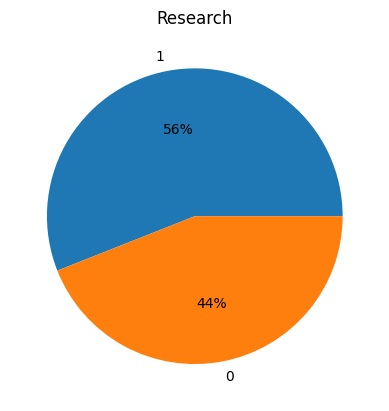

In [14]:
plt.pie(df.Research.value_counts(), labels=df.Research.value_counts().index, autopct='%.0f%%')
plt.title('Research');

- 56% of applicants have research experience, which suggests that research is a relatively common qualification among the applicant pool.

In [15]:
df['University Rating'].value_counts()

University Rating
3    162
2    126
4    105
5     73
1     34
Name: count, dtype: int64

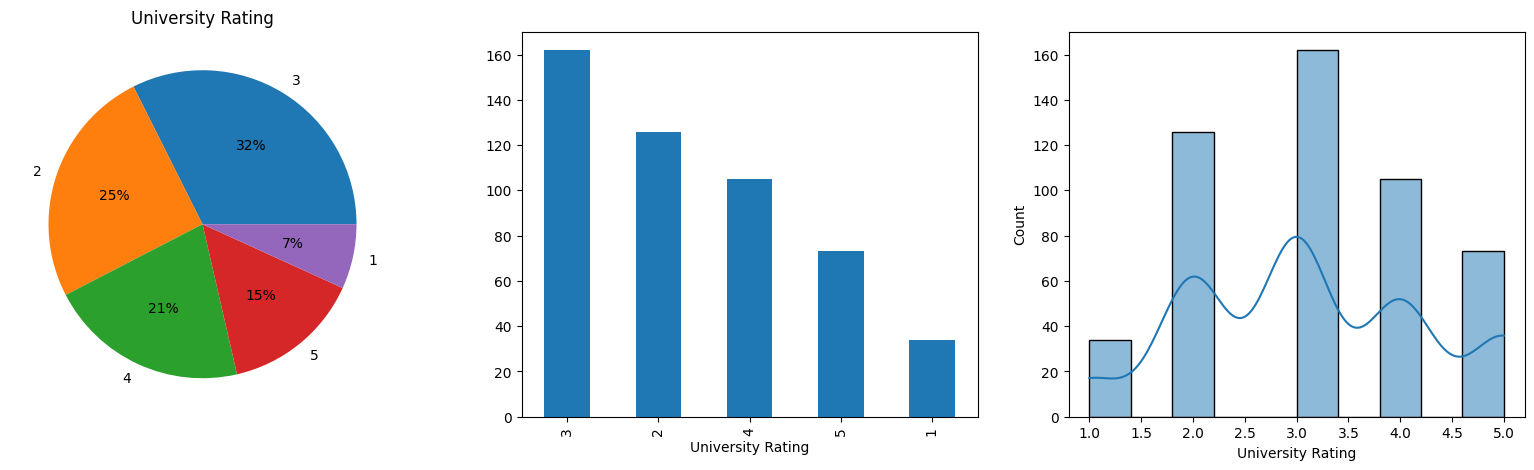

In [16]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.pie(df['University Rating'].value_counts(), labels=df['University Rating'].value_counts().index, autopct='%.0f%%')
plt.title('University Rating')
plt.subplot(1, 3, 2)
df['University Rating'].value_counts().plot(kind='bar')
plt.subplot(1, 3, 3)
sns.histplot(df['University Rating'], kde=True);

- Rating 3 is the most frequent university rating, accounting for over 32% of applicants. This indicates a substantial portion of applicants come from moderately ranked universities.
- Ratings 2, 3, and 4 dominate, collectively representing around 78.6% of the dataset.
- Relatively fewer applicants are associated with highly rated universities (Rating 5) or the lowest-rated ones (Rating 1).
- Only 7% of applicants come from universities with the lowest rating (1).
- Similarly, only 15% come from the highest-rated universities (5). This may reflect the competitive nature of Ivy League admissions, where mid-range institutions are the majority.

In [17]:
df.SOP.value_counts()

SOP
4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: count, dtype: int64

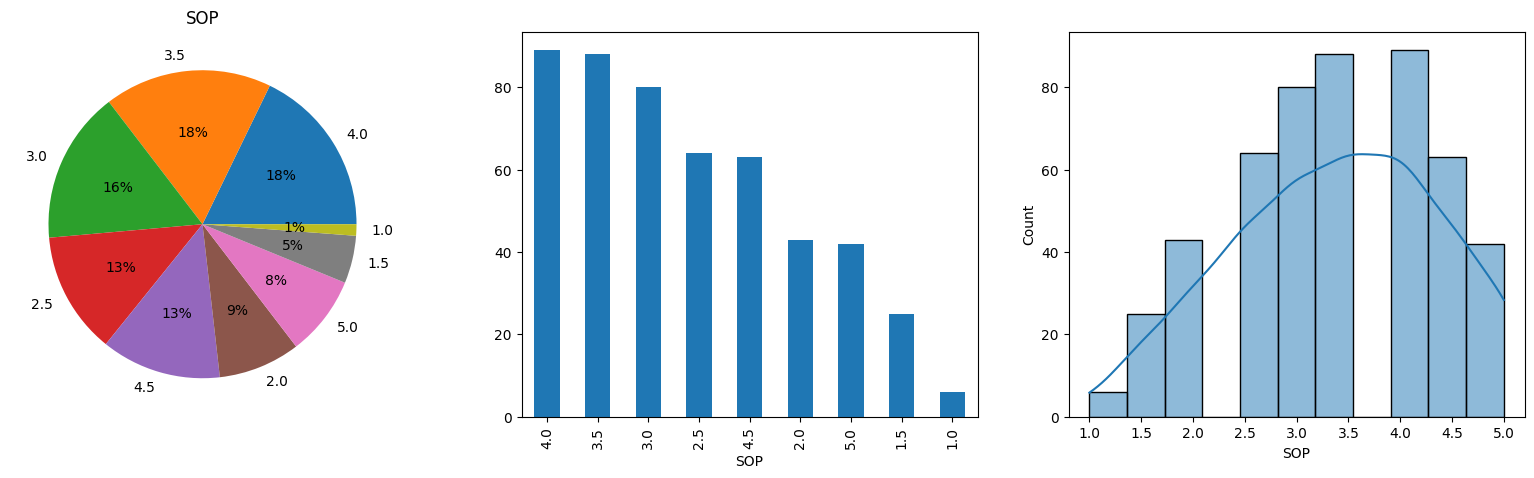

In [18]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.pie(df['SOP'].value_counts(), labels=df['SOP'].value_counts().index, autopct='%.0f%%')
plt.title('SOP')
plt.subplot(1, 3, 2)
df['SOP'].value_counts().plot(kind='bar')
plt.subplot(1, 3, 3)
sns.histplot(df.SOP, kde=True);

- The majority of applicants have an SOP score in the range of 3.0 to 4.5 (cumulatively 64%).
- SOP ratings of 4.0 (17.8%) and 3.5 (17.6%) are the most frequent, suggesting many applicants aim for moderately strong statements.
- The data is slightly skewed toward higher SOP scores, with 42.4% of applicants scoring 4.0 or higher.
- Only 6.2% of applicants have weak SOPs (scores of 1.0 or 1.5).
- Very few applicants (1.2%) have the lowest SOP score (1.0), indicating that most applicants recognize the importance of a strong SOP for admissions.

In [19]:
df['LOR '].value_counts()

LOR 
3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: count, dtype: int64

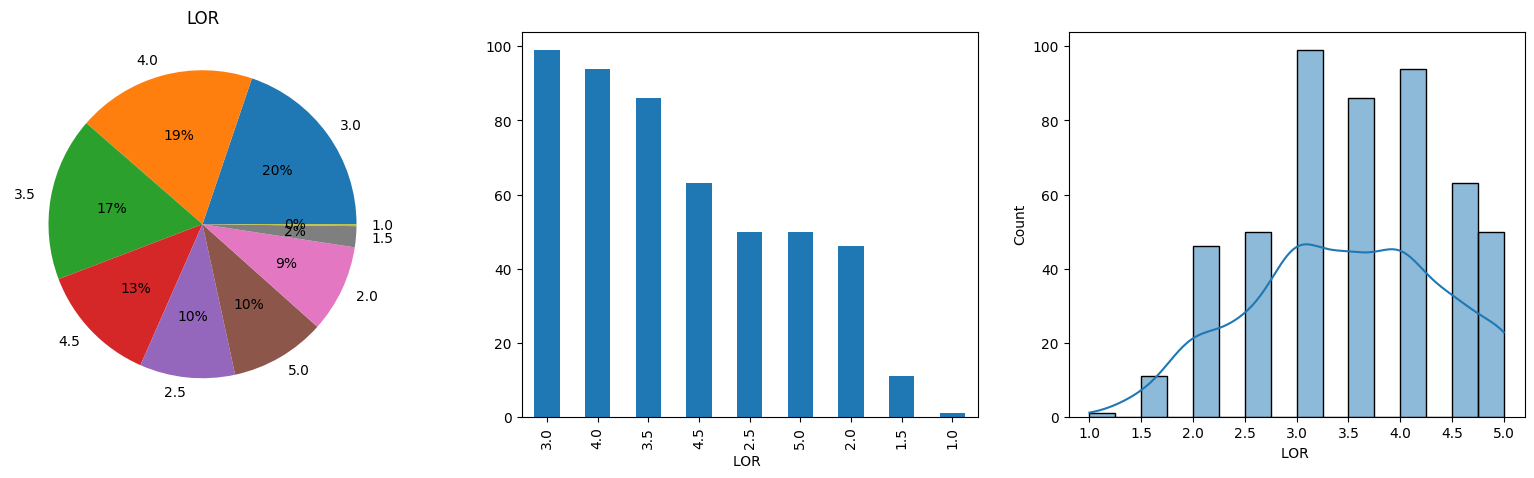

In [20]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.pie(df['LOR '].value_counts(), labels=df['LOR '].value_counts().index, autopct='%.0f%%')
plt.title('LOR')
plt.subplot(1, 3, 2)
df['LOR '].value_counts().plot(kind='bar')
plt.subplot(1, 3, 3)
sns.histplot(df['LOR '], kde=True);

- The most frequent ratings are 3.0 (19.8%) and 4.0 (18.8%), indicating that most applicants have moderately strong letters of recommendation.
- A high number of applicants have 3.0–4.5 ratings, showing that recommendation letters tend to be fairly good but not necessarily outstanding.
- A significant portion of applicants (56.2%) have LORs rated 3.0 or higher.
- Only a small fraction (0.4%) has the lowest possible LOR score (1.0), suggesting that the majority of applicants do not submit extremely weak recommendation letters.
- Very few applicants have 1.0 or 1.5 LORs (only 2.4% combined), implying that a poorly rated LOR is rare among this dataset.
- Only 2% of applicants have the highest LOR score (5.0), indicating that strong letters are not as common as moderately strong ones.

In [21]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


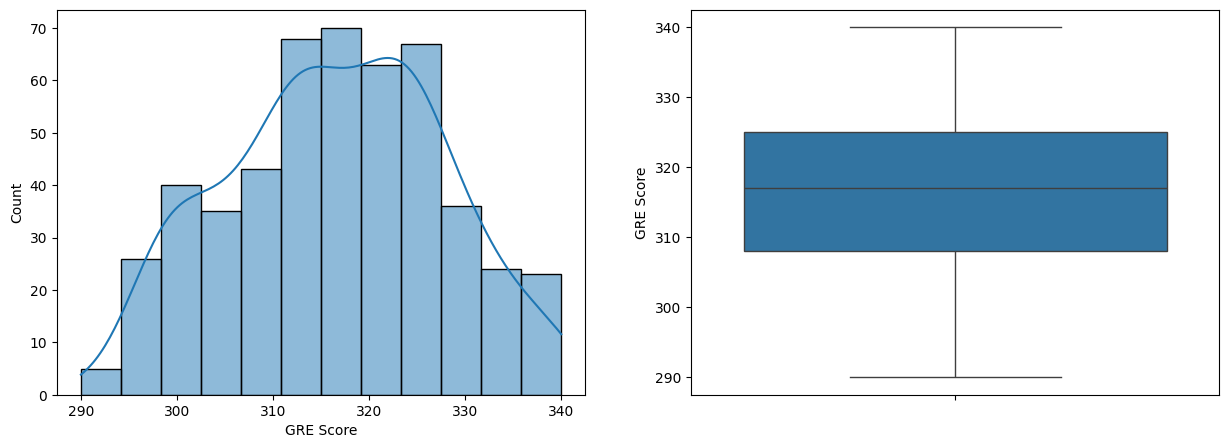

In [22]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['GRE Score'], kde=True)
plt.subplot(1, 2, 2)
sns.boxplot(df['GRE Score']);

- The histogram indicates a bell-shaped, roughly normal distribution of GRE scores, with the highest frequency around 310-320. The IQR (Interquartile Range) spans from about 300 to 320, indicating that 50% of the applicants scored within this range.
- The scores range from about 290 to 340, with most of the data falling between 300 and 330.
- There are few scores at the extremes (290 and 340), indicating that most applicants have moderate to high GRE scores. The whiskers extend from about 290 to 340, with no significant outliers beyond this range.
- The mode, or peak, of the distribution is around 320, suggesting that the majority of applicants in the dataset scored in this range.
- The distribution appears to be symmetrical, with no significant skew, as both the left and right sides of the histogram are relatively balanced.
- The absence of points outside the whiskers confirms that the distribution is not skewed by extreme outliers.

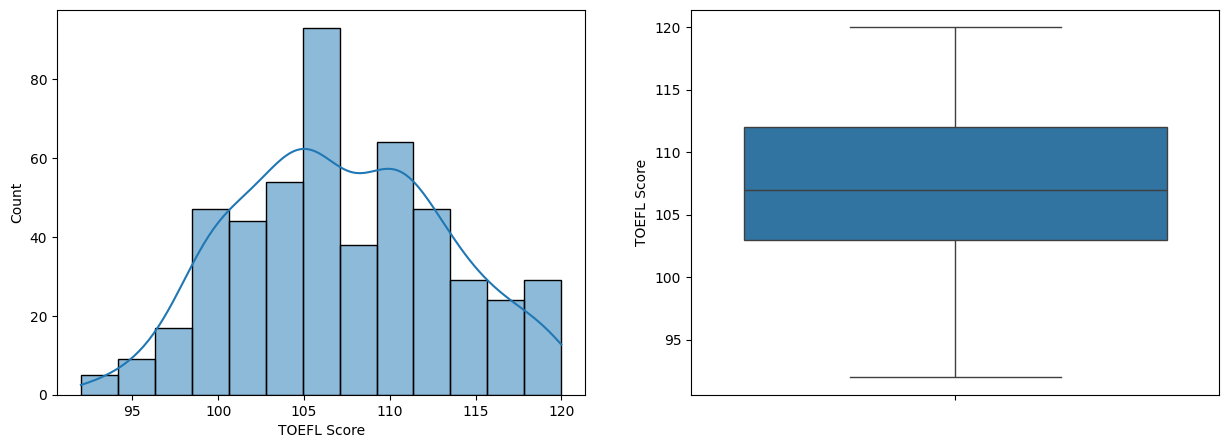

In [23]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['TOEFL Score'], kde=True)
plt.subplot(1, 2, 2)
sns.boxplot(df['TOEFL Score']);

- The histogram displays a bell-shaped distribution, which closely resembles a normal distribution.
- The median TOEFL score is around 105, as indicated by the line inside the box.
- The IQR (Interquartile Range) spans from about 100 to 110, indicating that 50% of the applicants scored within this range.
- The TOEFL scores range from about 95 to 120, with the majority of applicants scoring between 100 and 110.
- A few applicants have scores above 110, but these scores are less frequent.
- The mode, or peak of the distribution, is around 105, meaning most applicants scored within this range.
- The distribution is approximately symmetrical, with a slight tendency towards higher scores. However, the curve remains relatively balanced, indicating minimal skew.
- The whiskers extend from about 95 to 120, indicating that the range of scores is consistent with the histogram.
- There are no significant outliers beyond the whiskers, suggesting that the TOEFL scores are relatively consistent.

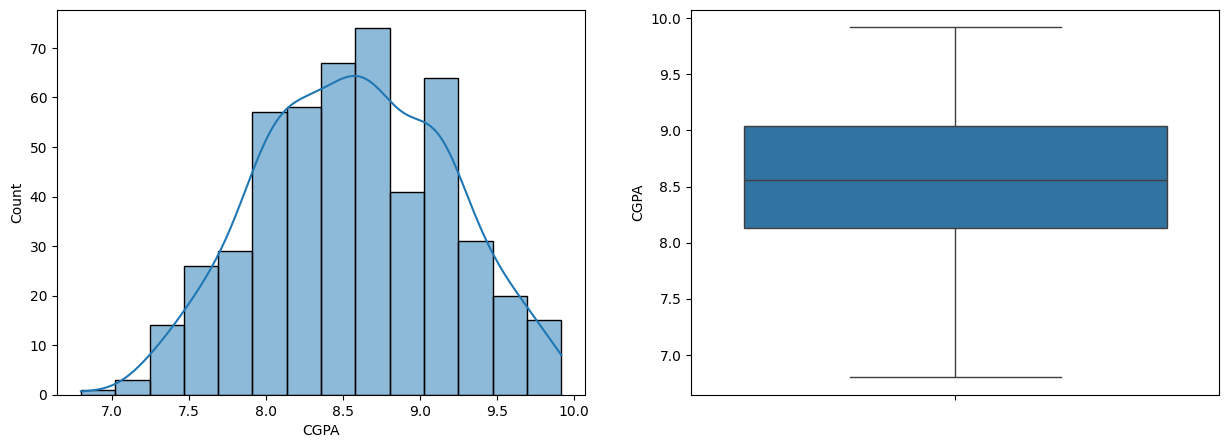

In [24]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['CGPA'], kde=True)
plt.subplot(1, 2, 2)
sns.boxplot(df['CGPA']);

- The histogram shows a bell-shaped distribution, resembling a normal distribution.
- The KDE curve supports this, peaking around 8.5 CGPA, indicating that most applicants have CGPA values near this score.
- The CGPA scores range from 7.0 to 10.0, with the majority of applicants scoring between 8.0 and 9.5.
- The distribution is somewhat symmetrical, though it has a slight rightward skew with fewer applicants achieving the maximum CGPA of 10.0.
- The mode of the distribution is around 8.5, meaning the majority of applicants have CGPAs around this value.
- The distribution is slightly right-skewed, as there are fewer applicants with CGPAs in the higher range (closer to 10).
- The median CGPA is around 8.7, as indicated by the line inside the box.
- The IQR (Interquartile Range) spans from about 8.0 to 9.2, meaning that 50% of the applicants scored within this range.
- The whiskers extend from around 7.0 to 10.0, indicating a relatively wide spread of scores.
- There are no significant outliers beyond the whiskers, suggesting that the CGPA scores are fairly consistent among applicants.

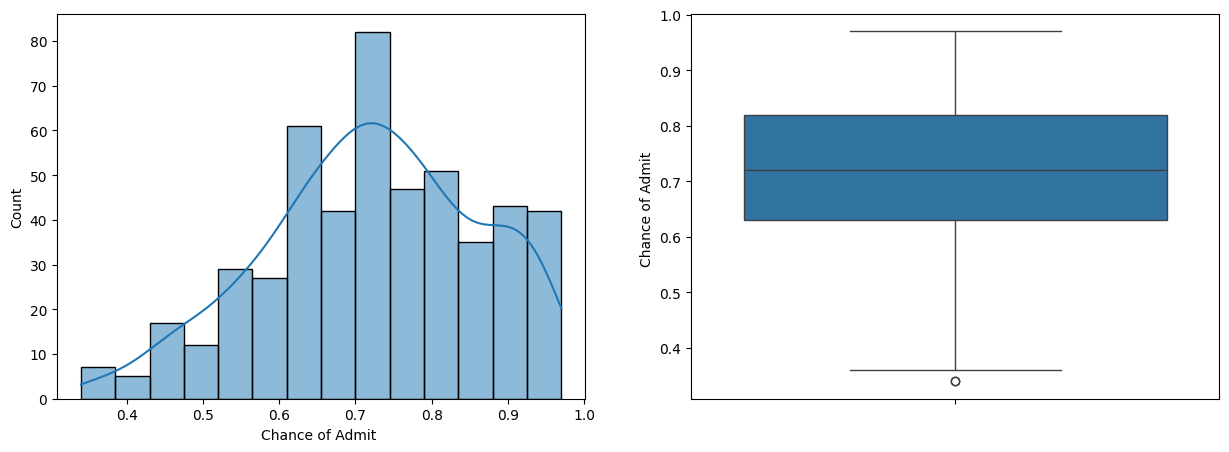

In [25]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Chance of Admit '], kde=True)
plt.subplot(1, 2, 2)
sns.boxplot(df['Chance of Admit ']);

- Most applicants have a "Chance of Admit" between 0.6 and 0.9, with a peak around 0.7 to 0.8.
- The median "Chance of Admit" is around 0.75, and the majority of the data falls between 0.7 and 0.85.
- The presence of an outlier suggests that there are a few applicants with a significantly lower chance of admission compared to the rest.
- The distribution is slightly right-skewed, meaning there are more applicants with a higher "Chance of Admit" than lower.
- The distribution does not appear to have heavy tails, indicating a relatively normal distribution with a slight skew.

**We know that our target variable/feature is 'Chance of Admit' so lets find out relationship between target and rest of the available features**

# Bivariate Analysis

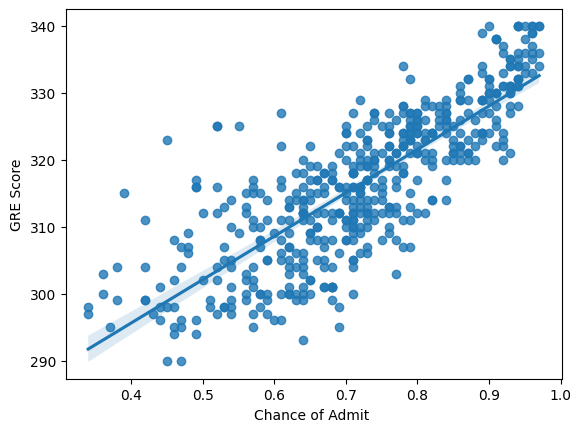

In [26]:
sns.regplot(data=df, x='Chance of Admit ', y='GRE Score');

- The scatter plot indicates a positive correlation between GRE scores and the chance of admission. As the GRE score increases, the chance of admission also tends to increase.
- The trend line in the scatter plot reinforces the positive correlation. It shows a clear upward trend, suggesting that higher GRE scores are generally associated with a higher chance of admission.
- The data points are spread across the plot, with most points concentrated in the middle range of GRE scores (around 300 to 330) and chance of admission (around 0.6 to 0.9). There are fewer data points at the extremes, indicating that very low or very high GRE scores are less common.
- There are a few outliers where applicants with lower GRE scores have a higher chance of admission and vice versa. These outliers could be due to other factors influencing the admission decision, such as strong SOPs, LORs, or research experience.

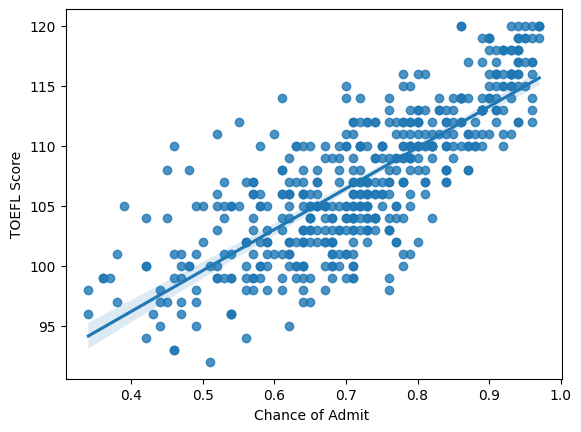

In [27]:
sns.regplot(data=df, x='Chance of Admit ', y='TOEFL Score');

- The scatter plot indicates a positive correlation between TOEFL scores and the chance of admission. As the TOEFL score increases, the chance of admission also tends to increase.
- The trend line in the scatter plot reinforces the positive correlation. It shows a clear upward trend, suggesting that higher TOEFL scores are generally associated with a higher chance of admission.
- The data points are spread across the plot, with most points concentrated in the middle range of TOEFL scores (around 100 to 115) and chance of admission (around 0.6 to 0.9). There are fewer data points at the extremes, indicating that very low or very high TOEFL scores are less common.

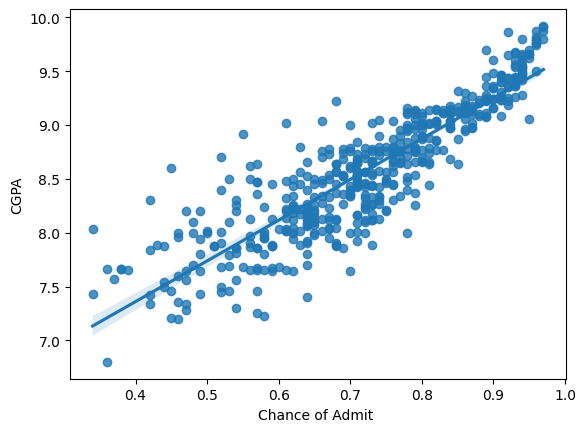

In [28]:
sns.regplot(data=df, x='Chance of Admit ', y='CGPA');

- The scatter plot indicates a positive correlation between CGPA and the chance of admission. As the CGPA increases, the chance of admission also tends to increase.
- The data points are spread across the plot, with most points concentrated in the middle range of CGPA scores (around 8.0 to 9.5) and chance of admission (around 0.6 to 0.9).

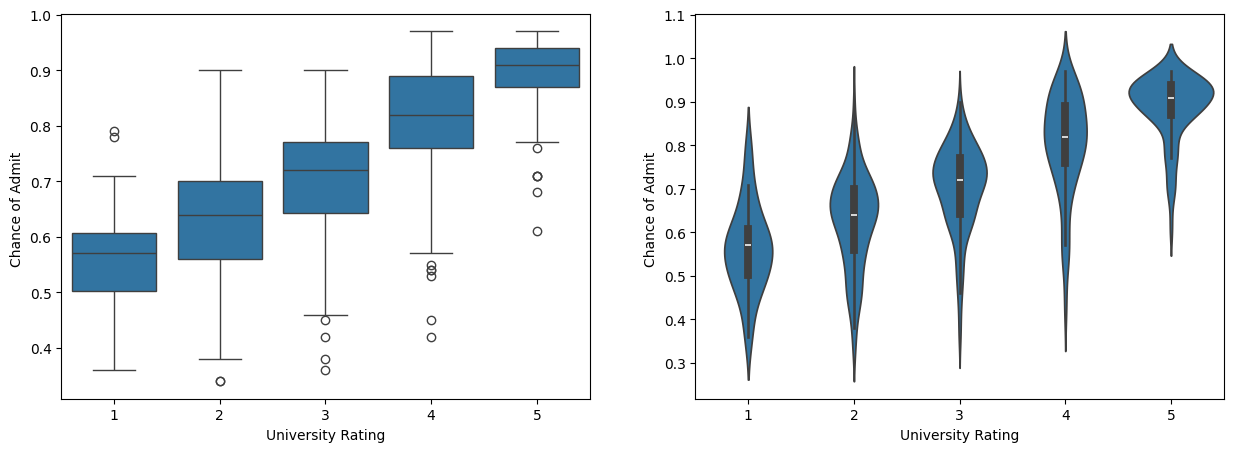

In [29]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='University Rating', y='Chance of Admit ', data=df)
plt.subplot(1, 2, 2)
sns.violinplot(x='University Rating', y='Chance of Admit ', data=df);

- Higher University Ratings correspond to higher chances of admission.
- Higher university ratings have a more concentrated distribution, indicating a higher and more consistent chance of admission.
- University Rating 5 has the highest median chance of admission, followed by ratings 4, 3, 2, and 1.
- There are more outliers in the lower university ratings, indicating more variability in the chance of admission.
- The distribution of the chance of admission is more spread out for lower university ratings.
- The median chance of admission increases with the university rating, similar to the box plot.

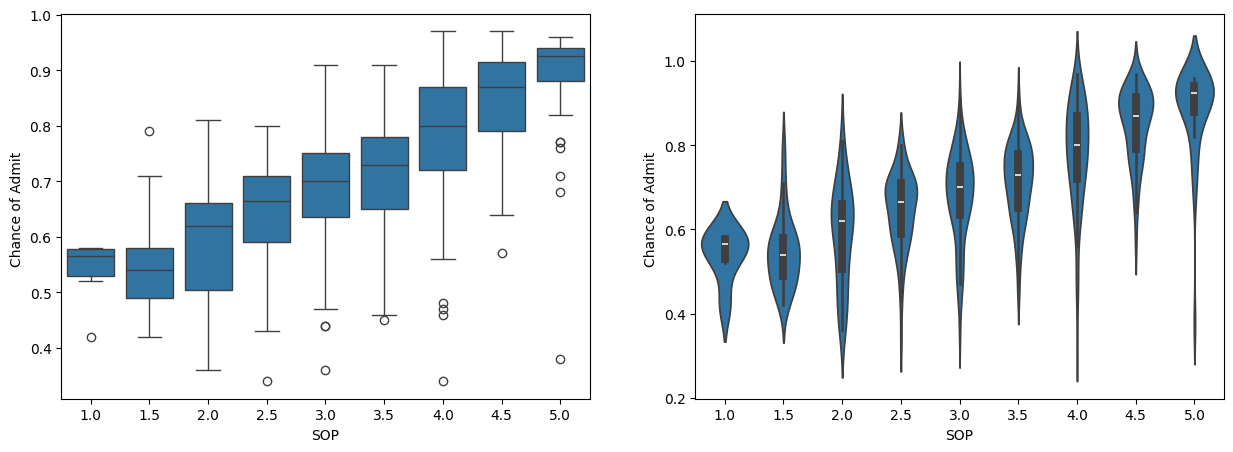

In [30]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='SOP', y='Chance of Admit ', data=df)
plt.subplot(1, 2, 2)
sns.violinplot(x='SOP', y='Chance of Admit ', data=df);

- Higher SOP Scores correspond to higher chances of admission.
- Higher SOP scores have a more concentrated distribution, indicating a higher and more consistent chance of admission.
- SOP scores of 5.0 have the highest median chance of admission, followed by scores of 4.0, 3.0, 2.0, and 1.0.
- There are more outliers in the lower SOP scores, indicating more variability in the chance of admission.
- The distribution of the chance of admission is more spread out for lower SOP scores.

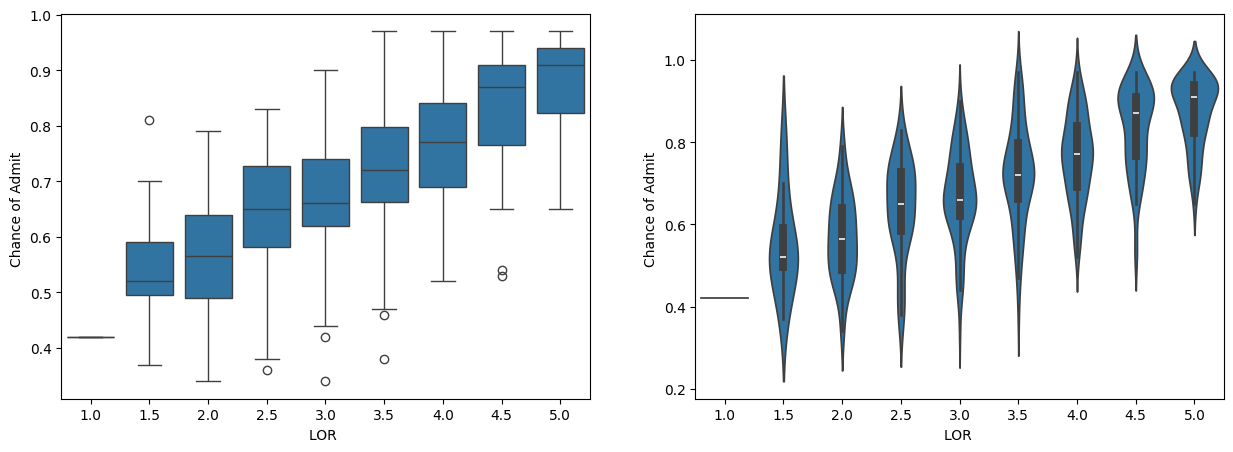

In [31]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='LOR ', y='Chance of Admit ', data=df)
plt.subplot(1, 2, 2)
sns.violinplot(x='LOR ', y='Chance of Admit ', data=df);

- Higher LOR Ratings correspond to higher chances of admission.
- The distribution of the chance of admission is more spread out for lower LOR ratings.
- LOR ratings of 5.0 have the highest median chance of admission, followed by ratings of 4.0, 3.0, 2.0, and 1.0.
- There are more outliers in the lower LOR ratings, indicating more variability in the chance of admission.

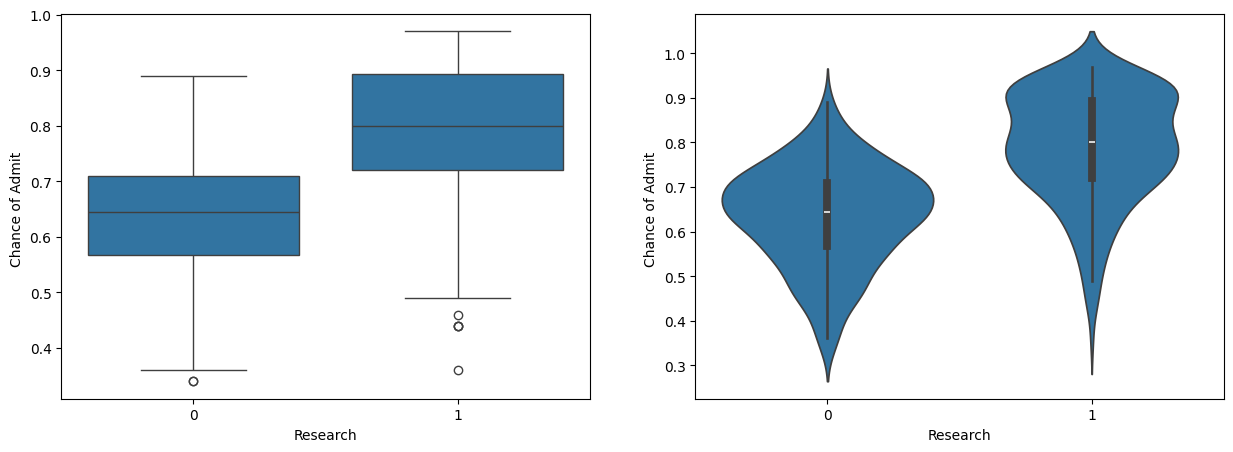

In [32]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Research', y='Chance of Admit ', data=df)
plt.subplot(1, 2, 2)
sns.violinplot(x='Research', y='Chance of Admit ', data=df);

- For applicants without research experience (Research = 0):
    - The median "Chance of Admit" is around 0.65.
    - The interquartile range (IQR) is approximately from 0.58 to 0.71.
    - There are a few outliers below 0.36.
    - The distribution is relatively symmetric with a peak around the median value. <br><br>

- For applicants with research experience (Research = 1):
    - The median "Chance of Admit" is around 0.8.
    - The IQR is approximately from 0.7 to 0.9.
    - There are a few outliers below 0.5.
    - The distribution is also relatively symmetric but shows a higher density around the median value compared to those without research experience.

# Correlation among features (except Target Variable) <br>
**Reason to exclude target variable:** Including the target variable in this correlation analysis would mix up the relationships between the target and features with relationships among the features themselves. The target variable should only be considered as the outcome of the model, not as a part of the feature set when analyzing correlations between the predictors.<br><br>
Also, it is better to use Spearman correlation method as we have ordinal data in the mix so ranking system suits better <br><br>
We should also remove features with high correlation (>0.90) because of Multicollinearity Issues and Overfitting Risk

In [33]:
df.drop('Chance of Admit ', axis=1).corr(method='spearman')

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
GRE Score,1.000000,0.823853,0.643423,0.620688,0.514352,0.829251,0.578487
TOEFL Score,0.823853,1.000000,0.645533,0.644715,0.523434,0.809485,0.474540
University Rating,0.643423,0.645533,1.000000,0.729399,0.602319,0.703333,0.435351
SOP,0.620688,0.644715,0.729399,1.000000,0.662653,0.717384,0.409088
LOR,0.514352,0.523434,0.602319,0.662653,1.000000,0.639563,0.376166
CGPA,0.829251,0.809485,0.703333,0.717384,0.639563,1.000000,0.509264
Research,0.578487,0.474540,0.435351,0.409088,0.376166,0.509264,1.000000


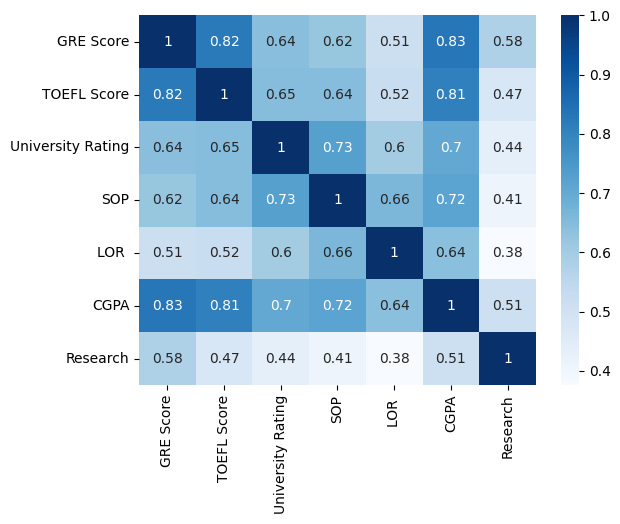

In [34]:
sns.heatmap(df.drop('Chance of Admit ', axis=1).corr(method='spearman'), annot= True, cmap='Blues');

- **Strongest Relationships:** GRE score, TOEFL score, and CGPA show very strong correlations, meaning that these features are highly predictive of each other and likely reflect overall academic performance.
- **University Rating:** The rating of a university is strongly related to test scores (GRE, TOEFL), SOP, and CGPA, but less strongly to research.
- **Research:** Research experience is moderately related to several features (GRE, TOEFL, CGPA), but has the weakest relationship with university rating, SOP, and LOR.
- **SOP and Letters of Recommendation:** Both SOP and LOR correlate moderately with academic performance metrics like GRE and CGPA, but LOR shows weaker correlation with research and other features.
- **Note:** As none of the correlation is crossing the benchmark so we can proceed without dropping any feature

# Preparation of data for modeling
We know there is one categorical column so generally we need to transform it for better performance but as there are only two categories so one will be max and other one will be min after transformation. Therefore no point of transforming

Need to Normalize data as ML model is bias towards high value so going to use Min-Max method but after the train-test split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [37]:
y_train = df_train['Chance of Admit ']
x_train = df_train.drop(['Chance of Admit '], axis=1)
y_train.shape, x_train.shape

((400,), (400, 7))

In [38]:
y_test = df_test['Chance of Admit ']
x_test = df_test.drop(['Chance of Admit '], axis=1)
y_test.shape, x_test.shape

((100,), (100, 7))

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [41]:
df_train = pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns)
df_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.40,0.428571,0.5,0.250,0.571429,0.503205,0.0,0.571429
1,0.56,0.642857,0.0,0.375,0.571429,0.557692,1.0,0.523810
2,0.20,0.321429,0.5,0.625,0.285714,0.346154,0.0,0.396825
3,0.20,0.250000,0.0,0.500,0.142857,0.000000,1.0,0.031746
4,0.64,0.428571,0.5,0.625,0.714286,0.653846,1.0,0.698413


In [42]:
df_test = pd.DataFrame(scaler.fit_transform(df_test), columns=df_test.columns)
df_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.46,0.48,0.25,0.375,0.250,0.441406,0.0,0.451613
1,0.44,0.52,0.50,0.500,0.500,0.453125,1.0,0.661290
2,0.98,1.00,1.00,0.875,0.750,0.937500,0.0,0.887097
3,0.52,0.52,0.25,0.625,0.625,0.523438,1.0,0.370968
4,0.70,0.64,0.75,0.875,0.750,0.648438,1.0,0.725806


# Linear Regression model

In [44]:
import statsmodels.api as sm

In [45]:
x_train_scaled = df_train.drop(['Chance of Admit '], axis=1) 
y_train_scaled = df_train['Chance of Admit ']

In [46]:
x_sm = sm.add_constant(x_train_scaled)  #Statmodels default is without intercept, to add intercept we need to add constant

In [47]:
sm_model = sm.OLS(y_train_scaled, x_sm).fit()

In [48]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.7
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          2.10e-142
Time:                        18:49:02   Log-Likelihood:                 374.46
No. Observations:                 400   AIC:                            -732.9
Df Residuals:                     392   BIC:                            -701.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0301      0.01

In [43]:
df.keys()

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')